In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colorsys
import parsedf
import json

%load_ext autoreload
%autoreload 2

In [27]:
df_raw = pd.read_csv("final.csv", skiprows=8)

In [32]:
df = df_raw.copy()
df = df.rename(columns={'% x': 'x', 'T (K)': 't', 'T2 (K)': 't2'})
df = df.drop(['t2'], axis=1)
df.head()

,x,y,z,t
0,0.702622,0.000000,-1.7,311.241137
1,0.943104,0.000000,-2.0,311.288678
2,0.000000,0.000000,-2.0,311.306193
3,0.640041,0.475757,-2.0,311.288411
4,2.297378,0.000000,-1.7,311.234330


In [58]:
df_zrounded = pd.DataFrame(columns = ['x', 'y', 'z_rounded', 't'])
for z_val in [2.5, 0.3, -2]:
    print(z_val)
    z_min = z_val - 0.5
    z_max = z_val + 0.5
    df_xy = df.copy()
    df_xy = df_xy.loc[(df['z'] > z_min) & (df['z'] < z_max)]
    df_xy['z_rounded'] = z_val
    print(df_xy.head())
    df_xy = df_xy[['x', 'y', 'z_rounded', 't']]
    df_zrounded = df_zrounded.append(df_xy)
    # df_xy = df_xy[['x', 'y', 't', 'z_rounded']]


2.5
         x         y    z           t  z_rounded
6566  2.75  0.499984  2.3  292.967769        2.5
6568  3.25  0.000000  2.3  292.930859        2.5
6569  2.25  0.000000  2.3  292.942982        2.5
6571  2.25  0.999968  2.3  293.069326        2.5
6578  2.75  1.502898  2.3  293.085806        2.5
0.3
           x         y    z           t  z_rounded
38  2.200000  0.150000  0.0  299.913014        0.3
39  2.232668  0.000000  0.0  299.892641        0.3
40  2.240318  0.000000  0.3  299.849381        0.3
41  1.700000  0.150000  0.0  299.925586        0.3
42  2.309181  0.607285  0.0  299.914959        0.3
-2
          x         y    z           t  z_rounded
0  0.702622  0.000000 -1.7  311.241137         -2
1  0.943104  0.000000 -2.0  311.288678         -2
2  0.000000  0.000000 -2.0  311.306193         -2
3  0.640041  0.475757 -2.0  311.288411         -2
4  2.297378  0.000000 -1.7  311.234330         -2


In [59]:
df_zrounded.z_rounded.unique()

array([ 2.5,  0.3, -2. ])

In [5]:
def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb

In [122]:
df_xy = df_zrounded.copy()
df_xy = df_xy.loc[df_xy['z_rounded'] == -2]
df_xy = df_xy.loc[(df_xy['x'] < 150) & (df_xy['x'] >= 0)]
df_xy = df_xy.loc[(df_xy['y'] < 150) & (df_xy['y'] >= 0)]
df_xy = df_xy[['x', 'y', 't']]
num_x = 5
num_y = 12
y_interval = np.floor((df_xy['y'].max() - df_xy['y'].min())/(num_y-1))
df_xy['y_round'] = df_xy[['y']]//y_interval
df_xy = df_xy.groupby(['y_round']).max().reset_index()
df_xy = df_xy[['y_round', 't']]
df_xy = df_xy.rename(columns={'y_round': 'y'})
df_final = pd.DataFrame(columns = ['x', 'y', 't'])
for i in range(num_x):
    df_tmp = df_xy.copy()
    df_tmp['x'] = i
    df_final = df_final.append(df_tmp)
df_final.x.unique()
t_min = df_zrounded['t'].min()
t_max = df_zrounded['t'].max()
t_range = t_max - t_min
df_final['t_normalized'] = (df_final['t']-t_min)/t_range
df_final['rgb'] = df_final.apply(lambda x: colorsys.hsv_to_rgb((x['t_normalized']/360*240), 1, 1), axis=1)
df_final['rgb_int'] = df_final['rgb'].apply(lambda x: (int(np.floor(x[0]*255)), int(np.floor(x[1]*255)), int(np.floor(x[2]*255))))
df_final['hex'] = df_final['rgb_int'].apply(lambda x: f'#{rgb_to_hex(x)}')


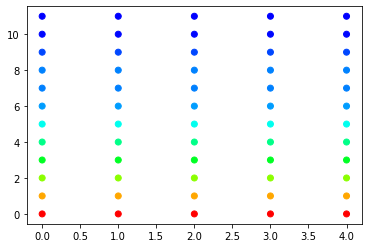

In [121]:
c = pd.DataFrame(df_final['rgb'].tolist())
plt.scatter(df_final['x'], df_final['y'], c=c.to_numpy())
plt.show()

In [10]:
df_rgb = c.copy()
df_rgb = df_rgb.head(19)
df_rgb = df_rgb*255
# df_rgb = df_rgb.apply(np.floor)
df_rgb = df_rgb.astype('int')
df_rgb

,0,1,2
0,255,19,0
1,255,101,0
2,255,194,0
3,236,255,0
4,161,255,0
5,92,255,0
6,23,255,0
7,0,255,34
8,0,255,90
9,0,255,147


In [26]:
str = ''
df_rgb = df_rgb.head(12)
for index, row in df_rgb.iterrows():
    r = row[0]
    g = row[1]
    b = row[2]
    str = str+f'{r},{g},{b},'
str


'255,19,0,255,101,0,255,194,0,236,255,0,161,255,0,92,255,0,23,255,0,0,255,34,0,255,90,0,255,147,0,255,200,0,254,255,'

In [12]:
c

,0,1,2
0,1.000000,0.075171,0.0
1,1.000000,0.397168,0.0
2,1.000000,0.762662,0.0
3,0.928495,1.000000,0.0
4,0.632897,1.000000,0.0
...,...,...,...
90,0.000000,0.436303,1.0
91,0.000000,0.275008,1.0
92,0.000000,0.080039,1.0
93,0.000000,0.000000,1.0


In [13]:
c[0:19]

,0,1,2
0,1.000000,0.075171,0.000000
1,1.000000,0.397168,0.000000
2,1.000000,0.762662,0.000000
3,0.928495,1.000000,0.000000
4,0.632897,1.000000,0.000000
5,0.364463,1.000000,0.000000
6,0.091080,1.000000,0.000000
7,0.000000,1.000000,0.135074
8,0.000000,1.000000,0.353882
9,0.000000,1.000000,0.576949


In [14]:
import serial

In [15]:
# Importing Libraries

# arduino = serial.Serial(port='/dev/cu.usbmodem101', baudrate=9600, timeout=.1)

arduino = serial.Serial(port='/dev/cu.usbmodem101', baudrate=115200, timeout=.1)

# while True:
#     num = input("Enter a number: ") # Taking input from user
#     value = write_read(num)
#     print(value) # printing the value


In [16]:
x = '255,19,0,255,101,0,255,194,0,236,255,0,161,255,0,92,255,0,23,255,0,0,255,34,0,255,90,0,255,147,0,255,200,0,254,255,0,208,255,0,163,255,0,118,255,0,80,255,0,40,255,0,17,255,0,29,255'
arduino.write(bytes(x, 'utf-8'))

180

In [17]:
arduino.close()

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colorsys
import parsedf

df_raw = pd.read_csv("Channels_75bar_500ms_1mm.csv", skiprows=8)
import parsedf

In [19]:
fig, str = parsedf.parse(df_raw, 5, 19)

      0    1    2
0   255   19    0
1   255  101    0
2   255  194    0
3   236  255    0
4   161  255    0
5    92  255    0
6    23  255    0
7     0  255   34
8     0  255   90
9     0  255  147
10    0  255  200
11    0  254  255
12    0  208  255
13    0  163  255
14    0  118  255
15    0   80  255
16    0   40  255
17    0   17  255
18    0   29  255
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 34
8 90
9 147
10 200
11 255
12 255
13 255
14 255
15 255
16 255
17 255
18 255
255,19,0,255,101,0,255,194,0,236,255,0,161,255,0,92,255,0,23,255,0,0,255,34,0,255,90,0,255,147,0,255,200,0,254,255,0,208,255,0,163,255,0,118,255,0,80,255,0,40,255,0,17,255,0,29,255
    index    0    1    2
0      37    0   36  255
1      36    0   15  255
2      35    0   38  255
3      34    0   78  255
4      33    0  115  255
5      32    0  158  255
6      31    0  208  255
7      30    0  251  255
8      29    0  255  209
9      28    0  255  151
10     27    0  255   99
11     26    0  255   33
12     25   23  255    0
13

In [20]:
json.loads('{"0": "255,19,0,255,101,0,255,194,0,236,255,0,161,255,0,92,255,0,23,255,0,0,255,34,0,255,90,0,255,147,0,255,200,0,254,255,0,208,255,0,163,255,0,118,255,0,80,255,0,40,255,0,17,255,0,29,25", "1": "0,36,255,0,15,255,0,38,255,0,78,255,0,115,255,0,158,255,0,208,255,0,251,255,0,255,209,0,255,151,0,255,99,0,255,33,23,255,0,91,255,0,157,255,0,226,255,0,255,190,0,255,111,0,255,21,", "2": "255,0,0,255,87,0,255,178,0,249,255,0,179,255,0,109,255,0,45,255,0,0,255,17,0,255,77,0,255,134,0,255,183,0,255,234,0,229,255,0,176,255,0,138,255,0,99,255,0,67,255,0,37,255,0,53,25", "3": "0,32,255,0,22,255,0,45,255,0,77,255,0,123,255,0,160,255,0,207,255,0,252,255,0,255,202,0,255,151,0,255,91,0,255,37,29,255,0,90,255,0,164,255,0,236,255,0,255,187,0,255,103,0,255,18,", "4": "255,17,0,255,94,0,255,195,0,240,255,0,157,255,0,94,255,0,20,255,0,0,255,38,0,255,104,0,255,150,0,255,215,0,249,255,0,197,255,0,134,255,0,111,255,0,70,255,0,20,255,0,0,255,0,12,25"}')

{'0': '255,19,0,255,101,0,255,194,0,236,255,0,161,255,0,92,255,0,23,255,0,0,255,34,0,255,90,0,255,147,0,255,200,0,254,255,0,208,255,0,163,255,0,118,255,0,80,255,0,40,255,0,17,255,0,29,25',
 '1': '0,36,255,0,15,255,0,38,255,0,78,255,0,115,255,0,158,255,0,208,255,0,251,255,0,255,209,0,255,151,0,255,99,0,255,33,23,255,0,91,255,0,157,255,0,226,255,0,255,190,0,255,111,0,255,21,',
 '2': '255,0,0,255,87,0,255,178,0,249,255,0,179,255,0,109,255,0,45,255,0,0,255,17,0,255,77,0,255,134,0,255,183,0,255,234,0,229,255,0,176,255,0,138,255,0,99,255,0,67,255,0,37,255,0,53,25',
 '3': '0,32,255,0,22,255,0,45,255,0,77,255,0,123,255,0,160,255,0,207,255,0,252,255,0,255,202,0,255,151,0,255,91,0,255,37,29,255,0,90,255,0,164,255,0,236,255,0,255,187,0,255,103,0,255,18,',
 '4': '255,17,0,255,94,0,255,195,0,240,255,0,157,255,0,94,255,0,20,255,0,0,255,38,0,255,104,0,255,150,0,255,215,0,249,255,0,197,255,0,134,255,0,111,255,0,70,255,0,20,255,0,0,255,0,12,25'}

In [21]:
arr = ['0,60,0,' for x in range(19)]

In [22]:
tmp = ''.join(arr)
tmp

'0,60,0,0,60,0,0,60,0,0,60,0,0,60,0,0,60,0,0,60,0,0,60,0,0,60,0,0,60,0,0,60,0,0,60,0,0,60,0,0,60,0,0,60,0,0,60,0,0,60,0,0,60,0,0,60,0,'

In [23]:
res = '255,19,0,255,101,0,255,194,0,236,255,0,161,255,0,92,255,0,23,255,0,0,255,34,0,255,90,0,255,147,0,255,200,0,254,255,0,208,255,0,163,255,0,118,255,0,80,255,0,40,255,0,17,255,0,29,2550,36,255,0,15,255,0,38,255,0,78,255,0,115,255,0,158,255,0,208,255,0,251,255,0,255,209,0,255,151,0,255,99,0,255,33,23,255,0,91,255,0,157,255,0,226,255,0,255,190,0,255,111,0,255,21,0,255,0,0,255,87,0,255,17'

In [24]:
len(res)

384

In [25]:
tmp.count('60')
# str.count(',')

19